In [70]:
import matplotlib.pyplot as plt
import numpy as np

lockfree_file = "latency_data/Lock-Free Queue_latencies.txt"
mutex_file = "latency_data/Mutex Queue_latencies.txt"


In [73]:
def read_file(file_path):
    with open(file_path,"r") as f:
        data = f.read()
    rows = data.split('\n')
    rows = [row for row in rows if rows!='']
    return rows

rows_lf = read_file(lockfree_file)
rows_m = read_file(mutex_file)

In [74]:
print(len(rows_lf))
print(len(rows_m))

1000001
1000001


[9.999990e-07 1.999998e-06 2.999997e-06 ... 9.999980e-01 9.999990e-01
 1.000000e+00]


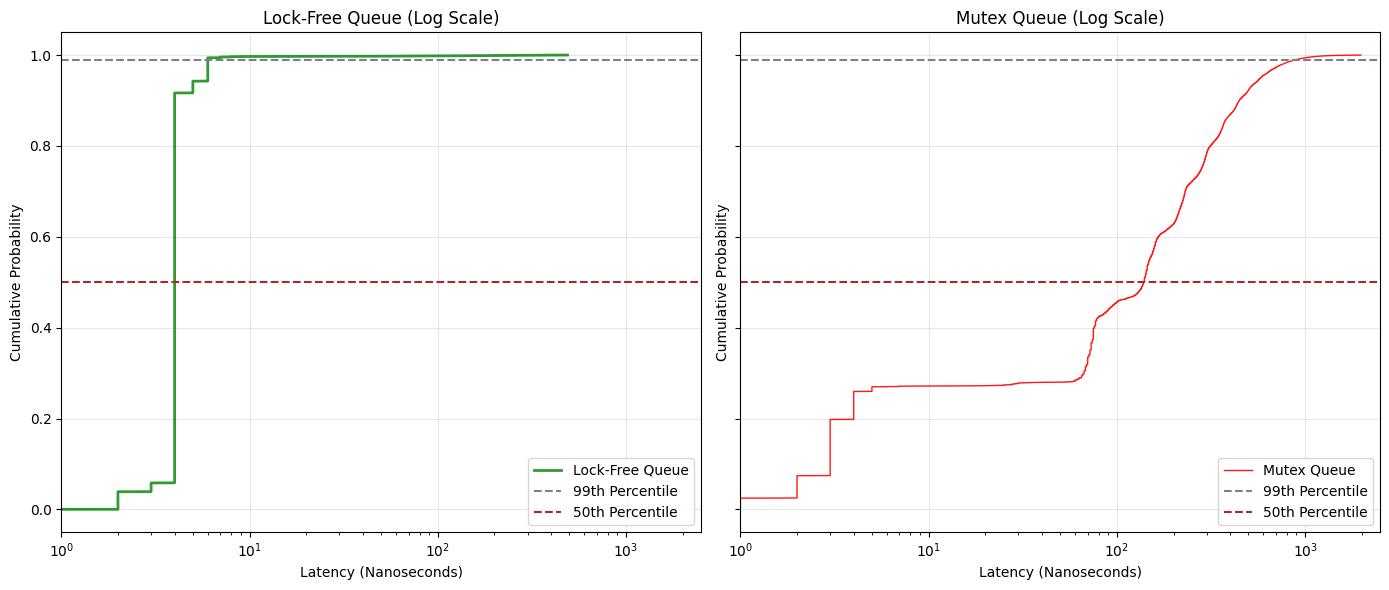

In [ ]:
def cdf_plots(rows_m, rows_lf):
    # cdf
    y_mutex = np.arange(1, len(rows_m) + 1) / len(rows_m)
    y_lockfree = np.arange(1, len(rows_lf) + 1) / len(rows_lf)
    # subplots
    _,(ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6),sharey=True)
    xmax=2.5e3
    xmin=1
    
    # lock free
    ax1.plot(rows_lf, y_lockfree, label='Lock-Free Queue', color='green', linewidth=2, alpha=0.8)
    ax1.set_xscale("log")
    ax1.axhline(y=0.99, color='gray', linestyle='--', label='99th Percentile')
    ax1.axhline(y=0.50, color='brown', linestyle='--', label='50th Percentile')
    ax1.set_xlim(xmin, xmax)
    ax1.set_title('Lock-Free Queue (Log Scale)')
    ax1.set_xlabel('Latency (Nanoseconds)')
    ax1.set_ylabel('Cumulative Probability')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # mutex
    ax2.plot(rows_m, y_mutex, label='Mutex Queue', color='red', linewidth=1, alpha=0.9)
    ax2.axhline(y=0.99, color='gray', linestyle='--', label='99th Percentile')
    ax2.axhline(y=0.50, color='brown', linestyle='--', label='50th Percentile')
    ax2.set_xlim(xmin, xmax)
    ax2.set_xscale("log")
    ax2.set_title('Mutex Queue (Log Scale)')
    ax2.set_xlabel('Latency (Nanoseconds)')
    ax2.set_ylabel('Cumulative Probability')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    plt.tight_layout()
    plt.show()

cdf_plots(rows_m=rows_m,rows_lf=rows_lf)